In [1]:
## Experiments

In [2]:
import yfinance as yf

def relativeAverageDailyRange(pricesDf, period):
    pricesDf['high_low_pc'] = pricesDf['High'] / pricesDf['Low']
    pricesDf["ADR"] = pricesDf['high_low_pc'].rolling(window=period).mean()
    pricesDf["rADR"] = 100 * pricesDf['ADR']
    return pricesDf

# Function to fetch historical stock prices and calculate ADR
def calculate_ADR(ticker, start_date, end_date, period):
    # Fetch historical data using yfinance
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Calculate ADR using the provided function
    data = relativeAverageDailyRange(data, period)
    
    # Return the DataFrame with ADR and rADR columns added
    return data

# Example usage
start_date = '2023-01-01'
end_date = '2023-12-31'
period = 20  # Adjust as needed

# Replace 'AAPL' with your desired ticker symbol
ticker = 'AAPL'

# Calculate ADR for the specified ticker and period
adr_data = calculate_ADR(ticker, start_date, end_date, period)

# Print the resulting DataFrame with ADR and rADR columns added
print(adr_data)


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.216301   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.497498   
2023-01-05  127.129997  127.769997  124.760002  125.019997  124.166641   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.735229   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.261597   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.353287   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.803986   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.903839   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.333298   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   

               Volume  high_low_pc   

In [22]:
import yfinance as yf

# ADR Values
def calculate_ADR(ticker, start_date, end_date, period):
    # Get historical pricing data
    data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate Daily Range for each period
    data['Daily_Range'] = data["High"] - data["Low"]

    # Calculate the average daily range over the specified period
    data["ADR"] = data['Daily_Range'].rolling(window=period).mean()

    return data["ADR"]

# ADR Percentage
def calculate_ADRP(data):
    data['DailyHigh'] = data['High']
    data['DailyLow'] = data['Low']
    ADR_highlow = (data['DailyHigh'] / data['DailyLow']).rolling(window=14).mean()
    ADR_perc = 100 * (ADR_highlow - 1)
    return ADR_perc

def calculate_ADRP2(data):
    # Calculate the daily range (High - Low) using a lambda function
    data['dr'] = data.apply(lambda x: x["High"] - x["Low"], axis=1)
    
    # Calculate the average daily range (ADR) over a 20-period interval
    data["adr"] = data['dr'].rolling(window=20).mean()
    
    return data["adr"]

# MOD ADR
def calculate_modified_ADR(data):
    data['dr_pct'] = data.apply(lambda x: 100 * (x["High"] / x["Low"] - 1), axis=1)
    data["mod_adr"] = data['dr_pct'].rolling(window=20).mean()
    return data["mod_adr"]

# Example usage
ticker = 'BLS.NS'
start_date = '2024-01-01'
end_date = '2024-04-06'
period = 20  # Adjust as needed
data = yf.download(ticker, start=start_date, end=end_date)


# Calculate ADR for the specified ticker and period
adr_data = calculate_ADR(ticker, start_date, end_date, period)
adr_perce = calculate_ADRP(data)
adr_mod = calculate_modified_ADR(data)
adr_p2 = calculate_ADRP2(data)

# View Result
print("P1", adr_data.tail(1))
print("ADR Percentage",adr_perce.tail(1))
print("ADR MOD",adr_mod.tail(1))
print("P2",adr_p2.tail(1))




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

P1 Date
2024-04-05    21.0925
Name: ADR, dtype: float64
ADR Percentage Date
2024-04-05    5.230024
dtype: float64
ADR MOD Date
2024-04-05    6.834477
Name: mod_adr, dtype: float64
P2 Date
2024-04-05    21.0925
Name: adr, dtype: float64


Periods:

In general:

- Short-term intraday traders (day trading) often use lower settings with periods in the range of 9-11.
- Medium-term swing traders frequently use the default period setting of 14.
- Longer-term position traders often set it at a higher period, in the range of 20-30.

In [1]:
from nsepython import *

print(get_blockdeals())


         Date  Symbol  Security Name  Client Name  Buy/Sell  Quantity Traded  \
0  NO RECORDS     NaN            NaN          NaN       NaN              NaN   

   Trade Price / Wght. Avg. Price  
0                             NaN  


In [2]:
print(nse_past_results('JUSTDIAL'))


{'resCmpData': [{'re_to_dt': '31-DEC-2023', 're_from_dt': '01-OCT-2023', 're_create_dt': '12-JAN-2024', 're_res_type': 'U', 're_excepn_items_new': '0', 're_desc_note_seg': '-', 're_staff_cost': '17851', 're_tot_exp_exc_pro_cont': None, 're_grs_npa': None, 're_int_expd': None, 're_con_pro_loss': '9201', 're_net_sale': '26505', 're_oth_exp': '2617', 're_rawmat_consump': '0', 're_diluted_eps': None, 're_inc_dre_sttr': '0', 're_pur_trd_goods': '0', 're_face_val': '10', 're_income_inv': None, 're_deff_tax': '1736', 're_share_associate': '0', 're_ret_asset': None, 're_proloss_ord_act': '9201', 're_notes_to_ac': '', 're_grs_npa_per': None, 're_excepn_items': None, 're_int_new': '217', 're_pro_los_frm_dis_opr': '0', 're_goi_per_shhd': None, 're_basic_eps_for_cont_dic_opr': '10.82', 're_oth_oper_exp': None, 're_remarks': None, 're_oth_pro_cont': None, 're_seg_remarks': None, 're_face_value_debt': None, 're_dilut_eps_for_cont_dic_opr': '10.82', 're_desc_note_fin': "Notes:          1. The above f

In [3]:
nse_events()


,symbol,company,purpose,bm_desc,date
0,AURIONPRO,Aurionpro Solutions Limited,Fund Raising,"To consider and approve the Issue price, inclu...",08-Apr-2024
1,CUPID,Cupid Limited,Financial Results/Other business matters,To consider and approve the financial results ...,08-Apr-2024
2,DPWIRES,D P Wires Limited,Other business matters,To consider other business matters,08-Apr-2024
3,GSPL,Gujarat State Petronet Limited,Dividend,To consider dividend,08-Apr-2024
4,PVSL,Popular Vehicles and Services Limited,Financial Results,To consider and approve the financial results ...,08-Apr-2024
...,...,...,...,...,...
124,ARE&M,Amara Raja Energy & Mobility Limited,Financial Results/Dividend,To consider and approve the audited financial ...,28-May-2024
125,MEDPLUS,Medplus Health Services Limited,Financial Results,To consider and approve the financial results ...,28-May-2024
126,MOTOGENFIN,The Motor & General Finance Limited,Financial Results,To consider and approve the financial results ...,28-May-2024
127,TTKPRESTIG,TTK Prestige Limited,Financial Results/Dividend/Other business matters,To consider and approve the financial results ...,28-May-2024


In [4]:
print(nse_quote("INFY","trade_info"))


{'noBlockDeals': True, 'bulkBlockDeals': [{'name': 'Session I'}, {'name': 'Session II'}], 'marketDeptOrderBook': {'totalBuyQuantity': 1059, 'totalSellQuantity': 0, 'bid': [{'price': 1479.1, 'quantity': 1059}, {'price': 0, 'quantity': 0}, {'price': 0, 'quantity': 0}, {'price': 0, 'quantity': 0}, {'price': 0, 'quantity': 0}], 'ask': [{'price': 0, 'quantity': 0}, {'price': 0, 'quantity': 0}, {'price': 0, 'quantity': 0}, {'price': 0, 'quantity': 0}, {'price': 0, 'quantity': 0}], 'tradeInfo': {'totalTradedVolume': 50.72, 'totalTradedValue': 750.84, 'totalMarketCap': 614494.42, 'ffmc': 528465.200658682, 'impactCost': 0.02, 'cmDailyVolatility': '1.52', 'cmAnnualVolatility': '29.04', 'marketLot': '', 'activeSeries': 'EQ'}, 'valueAtRisk': {'securityVar': 9.53, 'indexVar': 0, 'varMargin': 9.53, 'extremeLossMargin': 3.5, 'adhocMargin': 0, 'applicableMargin': 13.03}}, 'securityWiseDP': {'quantityTraded': 5072482, 'deliveryQuantity': 2939200, 'deliveryToTradedQuantity': 57.94, 'seriesRemarks': None

In [7]:
nse_results("equities","Quarterly")


,symbol,companyName,industry,audited,cumulative,indAs,reInd,period,relatingTo,financialYear,...,xbrl,format,params,resultDescription,resultDetailedDataLink,exchdisstime,difference,isin,broadCastDate,consolidated
0,GMBREW,GM Breweries Limited,-,Audited,Non-cumulative,Ind-AS New,N,Quarterly,Fourth Quarter,01-Apr-2023 To 31-Mar-2024,...,https://nsearchives.nseindia.com/corporate/xbr...,New,01-Jan-202431-Mar-2024Q4ANNNNEGMBREW,None,None,04-Apr-2024 15:40:06,00:02:26,INE075D01018,04-Apr-2024 15:37:40,Non-Consolidated


In [8]:
print(nse_marketStatus())


{'marketState': [{'market': 'Capital Market', 'marketStatus': 'Close', 'tradeDate': '05-Apr-2024 15:30', 'index': 'NIFTY 50', 'last': 22513.7, 'variation': -0.9500000000007276, 'percentChange': 0, 'marketStatusMessage': 'Market is Closed'}, {'market': 'Currency', 'marketStatus': 'Close', 'tradeDate': 'Invalid date', 'index': '', 'last': '', 'variation': '', 'percentChange': '', 'marketStatusMessage': 'Market is Closed'}, {'market': 'Commodity', 'marketStatus': 'Close', 'tradeDate': 'Invalid date', 'index': '', 'last': '', 'variation': '', 'percentChange': '', 'marketStatusMessage': 'Market is Closed'}, {'market': 'Debt', 'marketStatus': 'Close', 'tradeDate': 'Invalid date', 'index': '', 'last': '', 'variation': '', 'percentChange': '', 'marketStatusMessage': 'Market is Closed'}, {'market': 'currencyfuture', 'marketStatus': 'Close', 'tradeDate': 'Invalid date', 'index': '', 'last': '83.3400', 'variation': '', 'percentChange': '', 'marketStatusMessage': 'Market is Closed', 'expiryDate': 

In [ ]:
!pip uninstall numpy
!pip uninstall numba
python3 -m pip install numba


## Portfolio Analysis

In [2]:
import riskfolio as rp
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

SystemError: initialization of _internal failed without raising an exception

In [ ]:
assets = [
    "JCI",
    "TGT",
    "CMCSA",
    "CPB",
    "MO",
    "APA",
    "MMC",
    "JPM",
    "ZION",
    "PSA",
    "BAX",
    "BMY",
    "LUV",
    "PCAR",
    "TXT",
    "TMO",
    "DE",
    "MSFT",
    "HPQ",
    "SEE",
    "VZ",
    "CNP",
    "NI",
    "T",
    "BA",
    "^GSPC",
]

data = yf.download(assets, start="2016-01-01", end="2019-12-30")
data = data.loc[:, ("Adj Close", slice(None))]
data.columns = assets

In [3]:
import numpy as np

In [5]:
import pandas as pd

def xlsx_to_csv(input_file, output_file):
    # Read Excel file
    df = pd.read_excel(input_file)
    
    # Write to CSV
    df.to_csv(output_file, index=False)

# Example usage
input_file = "../Data/pnl-OB3975.xlsx"
output_file = "../Data/output.csv"
xlsx_to_csv(input_file, output_file)


In [6]:
import pandas as pd

# Read Excel file
df = pd.read_excel('../Data/pnl-OB3975.xlsx')
input_file = "../Data/pnl-OB3975.xlsx"


# Display the DataFrame
print(df)


     Unnamed: 0   Unnamed: 1    Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0           NaN          NaN           NaN        NaN        NaN        NaN   
1           NaN          NaN           NaN        NaN        NaN        NaN   
2           NaN          NaN           NaN        NaN        NaN        NaN   
3           NaN          NaN           NaN        NaN        NaN        NaN   
4           NaN          NaN           NaN        NaN        NaN        NaN   
..          ...          ...           ...        ...        ...        ...   
105         NaN          VBL  INE200M01021          0          0          0   
106         NaN         VEDL  INE205A01025          9     2568.2    2277.45   
107         NaN  VIKASLIFE-T  INE161L01027          0          0          0   
108         NaN   WELSPUNLIV  INE192B01031         65    7593.75    10289.5   
109         NaN        WIPRO  INE075A01022          0          0          0   

    Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unn

In [5]:
import pandas as pd
import plotly.graph_objects as go

# Read the CSV file
df = pd.read_csv("../Data/pnl-march-1-23-to-march-28-24.csv")


# Calculate total Realized P&L and Realized P&L Pct.
total_realized_pl = df["Realized P&L"].sum()
total_realized_pl_pct = df["Realized P&L Pct."].sum()

print("Total Realized P&L:", total_realized_pl)
print("Total Realized P&L Pct.:", total_realized_pl_pct)




Total Realized P&L: 56402.8829
Total Realized P&L Pct.: 1442.4121


In [6]:
# Define the data as a list
realized_pl_data = [
    0, 6934.7, -39.25, 0, 1928.5, 0, 1607.4, 0, -49.2, -83.6,
    1384, 0, 156.63, -529.65, -736, 1545.75, 0, 638.5, 257.5, 595.5,
    23.64, 0, 0, 78, 120.75, 6.05, 13185.5, 4308.25, -4108.1, 0,
    0, 0, 9.95, 0, 3150, 0, -63.75, 1618.5, 74.5, -830.5, 1778.59,
    34.56, 112.2, 597.87, -668.5, 0, 592.5, 2681.4829, 0, 1719.75,
    14908, 1727.3, 62.5, -591.45, 1566.85, -1078.4, 18.86, -401.7, 0,
    1497.3, 0, 100.3, -1018.7, -833.4, 0, 66, -57.6, 0, 0, -290.75, 0, 2695.75, 0
]

# Calculate the sum of Realized P&L
total_realized_pl = sum(realized_pl_data)

print("Total Realized P&L:", total_realized_pl)


Total Realized P&L: 56402.88290000001


## CAGR

CAGR: 19.76%


Financial Year 23-24
CAGR: 19.76%
Total Realized P&L: 56402.88290000001
Total Profits: 67783.4329
Total Losses: -11380.55
Total Returns Percentage: 1442.41%
One-year return: 19.76%


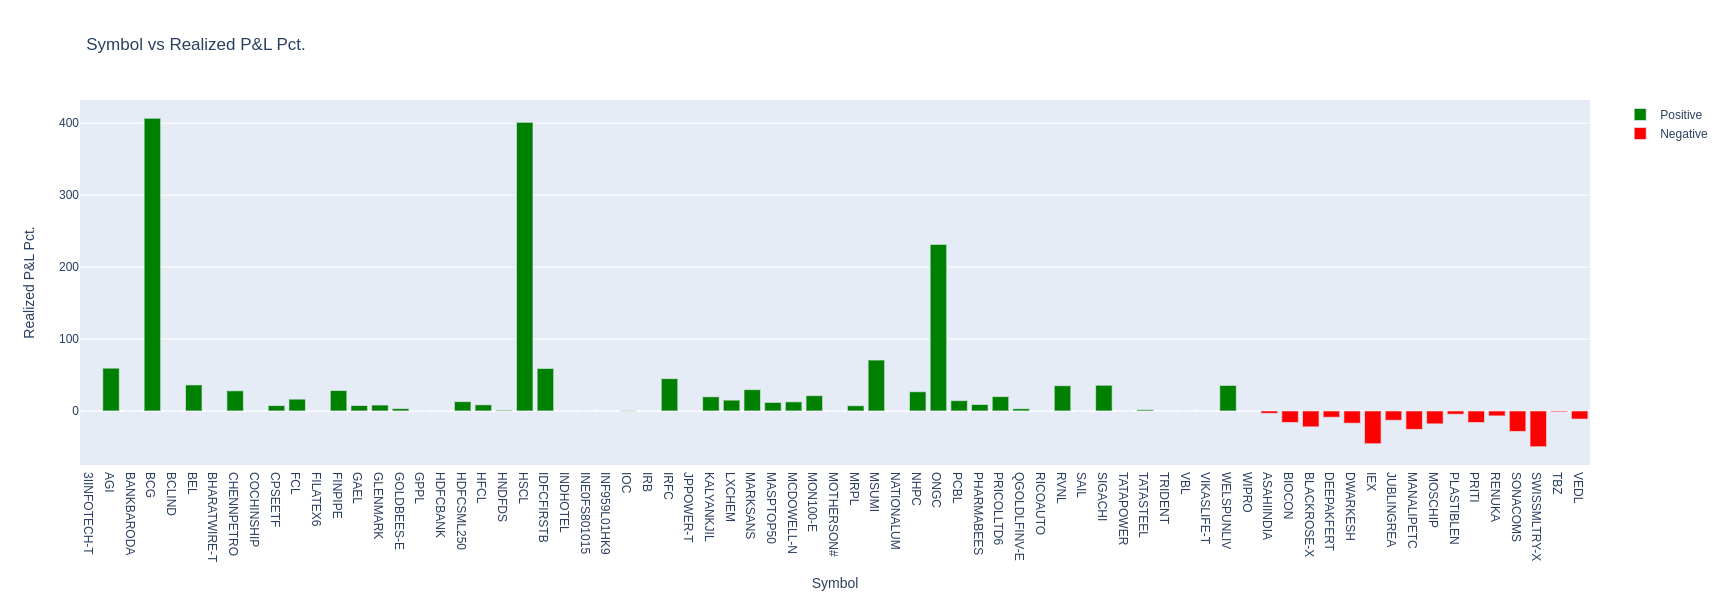

In [33]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt



# Read the CSV file and extract the desired column
df = pd.read_csv("../Data/pnl-march-1-23-to-march-28-24.csv")
realized_pl_data = df["Realized P&L"].tolist()
realized_pl_pct_data = df["Realized P&L Pct."].tolist()
unrealized_pl_data = df["Unrealized P&L"].tolist()
unrealized_pl_data_pct = df["Unrealized P&L Pct."].tolist()

#print(realized_pl_pct_data)
print("Financial Year 23-24")

# Calculate the CAGR
num_data_points = len(realized_pl_pct_data)
total_pct_change = sum(realized_pl_pct_data)
cagr = total_pct_change / num_data_points
print("CAGR:", '{:.2%}'.format(cagr / 100))

# Calculate the sum of Realized P&L
total_realized_pl = sum(realized_pl_data)
print("Total Realized P&L:", total_realized_pl)

# # Calculate unrealized PnL
# total_unrealized_pl = sum(unrealized_pl_data)
# print("Total Unrealized P&L:", total_unrealized_pl)

# Calculate Unrealzied PnL Pct.
# Calculate the total percentage from the "Realized P&L Pct." column
total_pct = df["Realized P&L Pct."].sum()


# Separate profits (positive values) and losses (negative values)
profits = df[df["Realized P&L"] > 0]["Realized P&L"].sum()
losses = df[df["Realized P&L"] < 0]["Realized P&L"].sum()

print("Total Profits:", profits)
print("Total Losses:", losses)
print("Total Returns Percentage:", '{:.2%}'.format(total_pct/100))


# Calculate the weighted average return
total_invested = len(realized_pl_pct_data)  # Assuming equal investment in each stock
one_year_return = sum(realized_pl_pct_data) / total_invested

print("One-year return:", '{:.2%}'.format(one_year_return/100))

##-------------------------------

# Separate positive and negative values
positive_values = df[df["Realized P&L Pct."] >= 0]
negative_values = df[df["Realized P&L Pct."] < 0]

# Create trace for positive values
trace_positive = go.Bar(
    x=positive_values["Symbol"],
    y=positive_values["Realized P&L Pct."],
    marker=dict(color='green'),
    name='Positive'
)

# Create trace for negative values
trace_negative = go.Bar(
    x=negative_values["Symbol"],
    y=negative_values["Realized P&L Pct."],
    marker=dict(color='red'),
    name='Negative'
)

# Combine traces
data = [trace_positive, trace_negative]

# Create layout
layout = go.Layout(
    title="Symbol vs Realized P&L Pct.",
    xaxis=dict(title="Symbol"),
    yaxis=dict(title="Realized P&L Pct."),
    height=600
)

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()


## CAGR 

$
CAGR = \left( \frac{{\text{Final Value}}}{{\text{Initial Value}}} \right)^{\frac{1}{{\text{Number of Years}}}} - 1
$

```
# Define the initial and final values
initial_value = realized_pl_pct_data[0]
final_value = realized_pl_pct_data[-1]

# Number of years (assuming one year)
num_years = 1

# Calculate CAGR
cagr = (final_value / initial_value) ** (1 / num_years) - 1

print("CAGR:", '{:.2%}'.format(cagr))

```